## Problem Statement:

#### Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

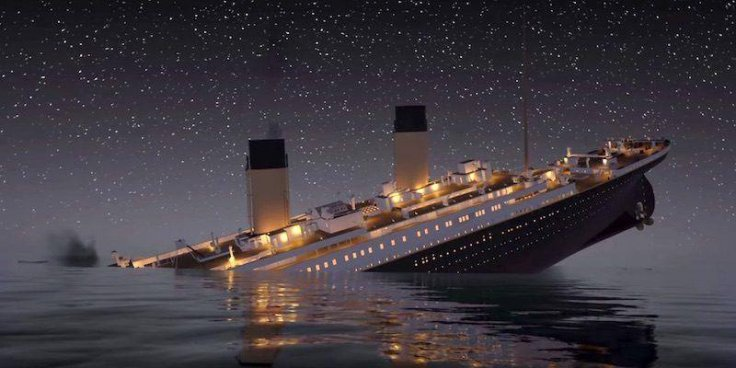

### Feature Descriptions:

+ survival : Survival 	0 = No, 1 = Yes
+ pclass : Ticket class 	1 = Upper, 2 = Middle, 3 = Lower
+ sex : Sex 	
+ Age : Age in years 	
+ sibsp : siblings/spouses aboard the Titanic(Sibling = brother, sister, stepbrother, stepsister || Spouse = husband, wife) 
+ parch : parents / children aboard the Titanic(Parent = mother, father || Child = daughter, son, stepdaughter, stepson) 	
+ ticket : Ticket number(Parent = mother, father,) 	
+ fare : Passenger fare 	
+ cabin : Cabin number 	
+ embarked : Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
## Including all necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Reading input file and upload into DataFrame

train = pd.read_csv("train.csv") 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## Columns informaton

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Finding null values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## Finding missing value columns 

missing = [feature for feature in train.columns if train[feature].isnull().sum()>1]
missing

['Age', 'Cabin', 'Embarked']

In [6]:
## Finding the missing persentage value

for column in missing:
    print("{} has {}% missing values".format(column,round(train[column].isnull().mean()*100,2)))

Age has 19.87% missing values
Cabin has 77.1% missing values
Embarked has 0.22% missing values


In [7]:
## Distribution of numerical features

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## Deleting the unwanted columns (PassengerId, Name, Ticket & Cabin)

df1 = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [9]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
## Finding the number of unique values of the each categoral features

for feature in [feature for feature in df1.columns if df1[feature].dtype == 'O']:
    print("{} has {} category : {}".format(feature,len(df1[feature].unique().tolist()),df1[feature].unique()))

Sex has 2 category : ['male' 'female']
Embarked has 4 category : ['S' 'C' 'Q' nan]


In [11]:
## Changing categoral values into numerical values

df1['New_Embarked'] = df1['Embarked'].apply(lambda x: 1 if x=='S' else ( 2 if x=='C' else 3))
df1['New_Sex'] = df1['Sex'].apply(lambda x: 1 if x=='male' else 0)
df1.Embarked.fillna("S")
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Embarked,New_Sex
0,0,3,male,22.0,1,0,7.2500,S,1,1
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,1
887,1,1,female,19.0,0,0,30.0000,S,1,0
888,0,3,female,NaN,1,2,23.4500,S,1,0
889,1,1,male,26.0,0,0,30.0000,C,2,1


In [12]:
## Removing Sex, Embaked columns

df2 = df1.drop(['Sex','Embarked'],axis=1)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,New_Embarked,New_Sex
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,2,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,1,1


In [13]:
df2.isnull().sum()

Survived          0
Pclass            0
Age             177
SibSp             0
Parch             0
Fare              0
New_Embarked      0
New_Sex           0
dtype: int64

#### Exploratory Data Analysis

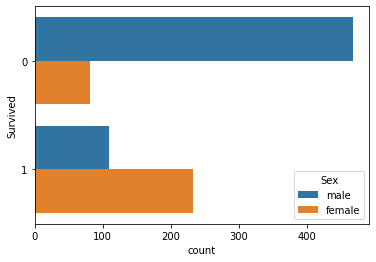

In [14]:
## Total number of passenger VS Survived with gender

ax = sns.countplot(y='Survived',hue = 'Sex',data=df1)

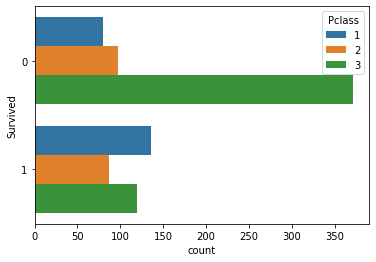

In [15]:
## Total number of passenger VS Survived with Passenger class

ax = sns.countplot(y='Survived',hue = 'Pclass',data=df1)

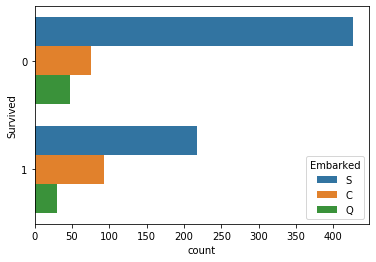

In [16]:
## Total number of passenger VS Survived with Embarked

ax = sns.countplot(y='Survived',hue ='Embarked',data=df1)

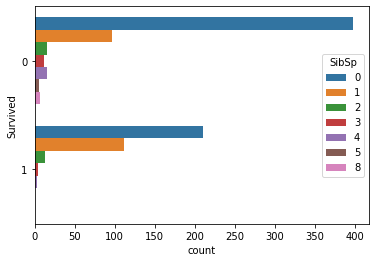

In [17]:
## Total number of passenger VS Survived with siblings / spouses aboard

ax = sns.countplot(y='Survived',hue ='SibSp',data=df1)

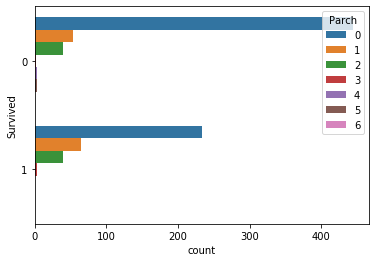

In [18]:
## Total number of passenger VS Survived with parents / children aboard 

ax = sns.countplot(y='Survived',hue ='Parch',data=df1)

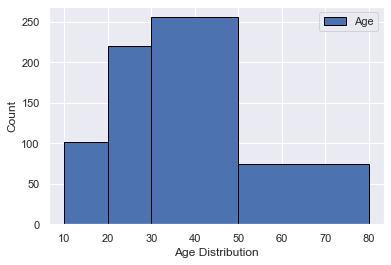

In [19]:
## Age distribution using histogram

sns.set()
plt.hist(df1.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Age'])
plt.xlabel("Age Distribution")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

In [20]:
male_Survived = df1[(df1.Survived==1) & (df1.Sex=='male')]
female_Survived = df1[(df1.Survived==1) & (df1.Sex=='female')]
male_NotSurvived = df1[(df1.Survived==0) & (df1.Sex=='male')]
female_NotSurvived = df1[(df1.Survived==0) & (df1.Sex=='female')]

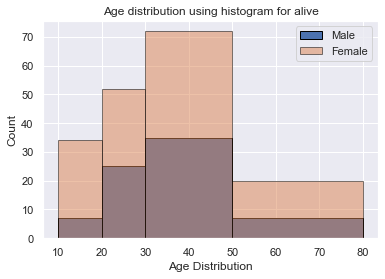

In [21]:
## Age distribution using histogram for alive

sns.set()
plt.hist(male_Survived.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Male'],alpha=1)
plt.hist(female_Survived.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Female'],alpha=0.5)
plt.xlabel("Age Distribution")
plt.ylabel("Count")
plt.title("Age distribution using histogram for alive")
plt.legend(loc='upper right')
plt.show()

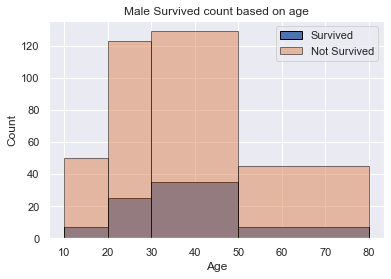

In [22]:
## Age distribution using histogram for alive mens

sns.set()
plt.hist(male_Survived.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Survived'],alpha=1)
plt.hist(male_NotSurvived.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Not Survived'],alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Male Survived count based on age")
plt.legend(loc='upper right')
plt.show()

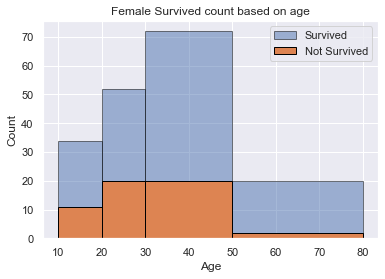

In [23]:
## Age distribution using histogram for alive female

sns.set()
plt.hist(female_Survived.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Survived'],alpha=0.5)
plt.hist(female_NotSurvived.Age, bins=[10,20,30,50,80],edgecolor='black', label=['Not Survived'],alpha=1)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Female Survived count based on age")
plt.legend(loc='upper right')
plt.show()

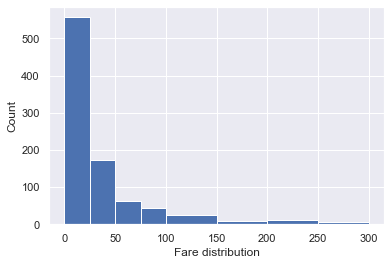

In [24]:
## Fare distribution

plt.hist(df1.Fare,bins=[0,25,50,75,100,150,200,250,300])
plt.xlabel("Fare distribution")
plt.ylabel("Count")
plt.show()

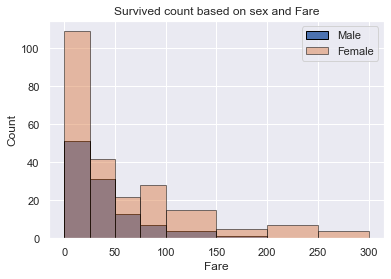

In [25]:
plt.hist(male_Survived.Fare, bins=[0,25,50,75,100,150,200,250,300],edgecolor='black', label=['Male'],alpha=1)
plt.hist(female_Survived.Fare, bins=[0,25,50,75,100,150,200,250,300],edgecolor='black', label=['Female'],alpha=0.5)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Survived count based on sex and Fare")
plt.legend(loc='upper right')
plt.show()

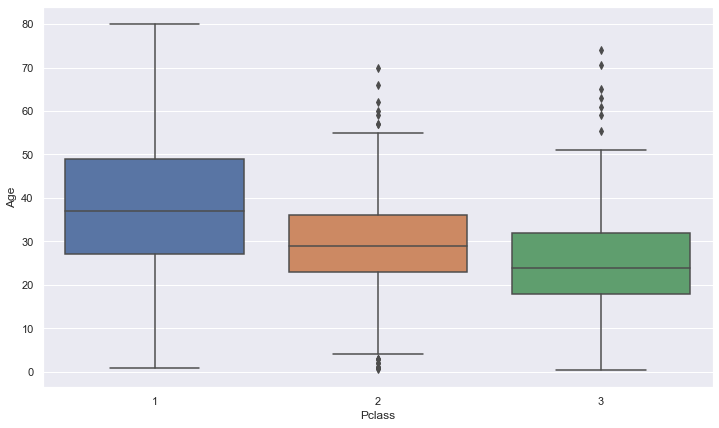

In [26]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df1)
plt.show()

So we can fill the null values based on ths mean value by comparing its Pclass type
+ From the above boxplot, We can say the mean age of Pclass value 1 is 28
+ From the above boxplot, We can say the mean age of Pclass value 2 is 30
+ From the above boxplot, We can say the mean age of Pclass value 1 is 24

In [27]:
## Filling the null value with respect to Age

def imputeAge(obj):
    age = obj[0]
    pclass = obj[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 28
        elif pclass==2:
            return 30
        else:
            return 24
    else:
        return age

In [28]:
df2['Age'] = df2[['Age','Pclass']].apply(imputeAge,axis=1)

In [29]:
df2.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
New_Embarked    0
New_Sex         0
dtype: int64

In [30]:
## Seperating dependent(y) & independent features(X)

X = df2.drop(['Survived'],axis=1)
y = df2['Survived']

In [31]:
# Split the dataset into 80% Training set and 20% Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [34]:
#Get and train all of the models
model = models(X_train,Y_train)

C:\Users\Harikumar-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy: 0.7935393258426966
[1]K Nearest Neighbor Training Accuracy: 0.8665730337078652
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7865168539325843
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8455056179775281
[4]Gaussian Naive Bayes Training Accuracy: 0.7921348314606742
[5]Decision Tree Classifier Training Accuracy: 0.9803370786516854
[6]Random Forest Classifier Training Accuracy: 0.9620786516853933


In [35]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extracting true_positives, false_positives, true_negatives, false_negatives
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  print(cm)
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[93 17]
 [15 54]]
Model[0] Testing Accuracy = "0.8212290502793296 !"

[[99 11]
 [18 51]]
Model[1] Testing Accuracy = "0.8379888268156425 !"

[[92 18]
 [20 49]]
Model[2] Testing Accuracy = "0.7877094972067039 !"

[[101   9]
 [ 23  46]]
Model[3] Testing Accuracy = "0.8212290502793296 !"

[[90 20]
 [17 52]]
Model[4] Testing Accuracy = "0.7932960893854749 !"

[[95 15]
 [20 49]]
Model[5] Testing Accuracy = "0.8044692737430168 !"

[[101   9]
 [ 21  48]]
Model[6] Testing Accuracy = "0.8324022346368715 !"



In [36]:
def test_predict(test):
    ## Deleting the unwanted columns (PassengerId, Name, Ticket & Cabin)

    t_df1 = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    ## Changing categoral values into numerical values

    t_df1['New_Embarked'] = t_df1['Embarked'].apply(lambda x: 1 if x=='S' else ( 2 if x=='C' else 3))
    t_df1['New_Sex'] = t_df1['Sex'].apply(lambda x: 1 if x=='male' else 0)
    t_df1.Fare.fillna(0.0,inplace=True)
    ## Removing Sex, Embaked columns
    
    t_df2 = t_df1.drop(['Sex','Embarked'],axis=1)

    t_df2['Age'] = t_df2[['Age','Pclass']].apply(imputeAge,axis=1)

    sc1 = StandardScaler()
    X_test1 = sc1.fit_transform(t_df2)
    return X_test1

In [37]:
test = pd.read_csv("test.csv")
test.isnull().sum()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
X_test1 = test_predict(test)

pred1 = model[6].predict(X_test1)


In [39]:
result = pd.DataFrame(list(zip(test.PassengerId, pred1)), 
               columns =['PassengerId', 'Survived']) 
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [40]:
result.to_csv(r'C:\Users\Harikumar-\Desktop\titanic\result.csv',index=False)